# HATE SPEECH CLASSIFICATION IN TWITTER WITH SVM

Pada project kali ini saya mengambil judul "HATE SPEECH CLASSIFICATION IN TWITTER WITH SVM" dengan menggunakan metode Support Vector Machine (SVM). Dataset yang saya gunakan berbentuk teks dan dataset ini merupakan data pengguna twitter Indonesia, dataset ini saya ambil dari kaggle.com 

Dataset yang saya gunakan bisa diakses pada link dibawah ini:

https://www.kaggle.com/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text

Sebelum masuk ke program, saya akan menjelaskan mengenai metode yang saya gunakan terlebih dahulu.


## SVM

svm adalah salah satu algoritma machine learning. SVM adalah supervised learning artinya dia belajar dari data yang sudah di labeli, SVM ini bisa digunakan untuk regresi dan klasifikasi. Cara kerja SVM dengan cara menemukan hyperplane yang paling optimal. Apa itu hyperplane? dan Bagaimana itu yang paling optimal?

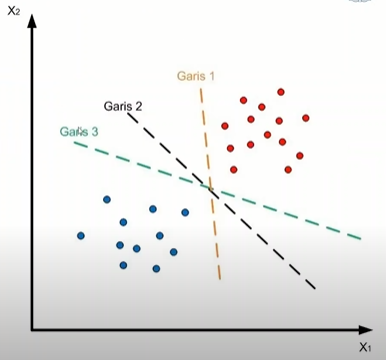

Gambar diatas merupakan ilustrasi sebuah problem klasifikasi. Dimana terdapat 2 kelas yaitu merah dan biru. Pada gambar diatas terdapat 3 garis putus-putus, garis tersebut adalah hyperplane atau bisa disebut sebagai garis pemisah dari kedua kelas tersebut. Dan yang paling optimal itu yang bagaimana? Jika kita perhatikan pada gambar terdapat 3 garis yaitu garis 1, garis 2, dan garis 3. Garis-gsris tersebut merupakan hyperplane. Dikatakan paling optimal jika garis yang mempunyai jarak paling jauh atau margin terjauh antara support vector dari dua buah kelas.

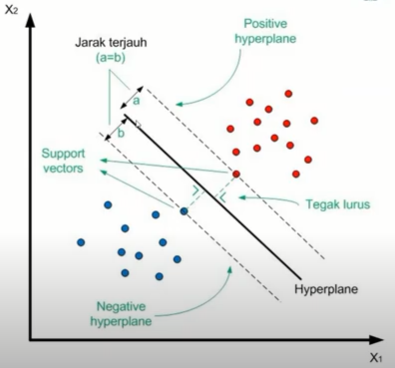

Berdasarkan gambar diatas hyperplane yang paling optimal adalah garis 2 atau garis hitam. Di gambar ada jarak terjauh yang merupakan jarak support terdekat antara kedua buah kelas kedalam hyperplane.

## SVM Kernel

Karena data yang kita terima tidak selamanya seperti pada gambar sebelumnya, ada kalanya data akan kemana-mana dan tidak beraturan, maka dari itu ada 3 trik kernel yaitu linier, rbf, dan poly.

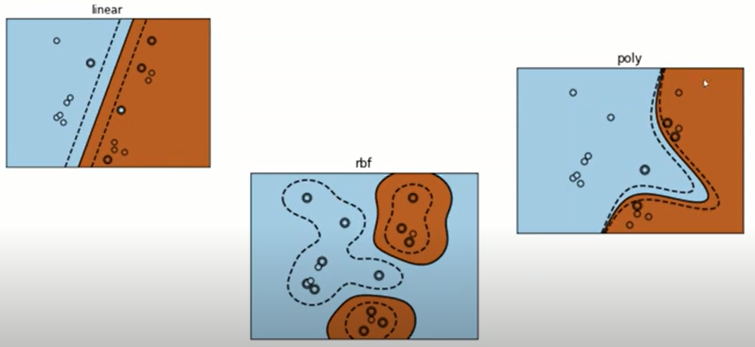

Linier --> Merupakan hyperplane yang lurus atau linier.

rbf --> Untuk mengklasifikasikan 2 kelas maka terbentuklah semacam sebuah peta.

Poly --> Tetap memisahkan 2 kelas tetapi terdapat lengkungan yang dalam.

Sebelum membahas lebih jauh, saya ingin menjelaskan sedikit mengenai program yang saya buat ini. Program ini merupakan sebuah prediksi pada twitter, dimana kita akan mengetahui tweet tersebut hate speech atau bukan hate speech.

## Load Library

Tahapan ini untuk memasukkan library atau module yang akan kita gunakan pada program ini.

In [13]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# MEMAHAMI DATA

## Load Dataset

Tahapan ini untuk memasukkan dataset yang akan kita gunakan dan dataset yang kita ambil dari kangle. Dataset ini terdiri dari 3 dataset, yaitu:

1. data, dataset ini berisi tweet pengguna twitter yang sudah dilabeli hate speech atau bukan hate speech.
2. new_kamusalay, dataset ini berisi kata-kata gaul atau bahasa yang tidak baku dan terjemahan kata baku nya.
3. abusive, dataset ini berisi kata-kata yang kasar atau bisa dibilang mengandung ujaran kebencian.

In [14]:
data = pd.read_csv ("data.csv", encoding='latin-1')

alay_dict = pd.read_csv ("new_kamusalay.csv", encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

id_stopword_dict = pd.read_csv ("abusive.csv", header = None)
id_stopword_dict = id_stopword_dict.rename (columns={0: 'stopword'})

#### Tabel dibawah ini adalah isi dari dataset "data" dimana sudah dilabeli, data yang digunakan hanya kolom HS dan kolom tweet dimana sudah dilabeli dengan 0 dan 1. 

#### 0 merupakan bukan hate speech.
#### 1 merupakan hate speech.

In [15]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


#### Pada tabel dapat kita ketahui banyaknya dataset yang akan kita gunakan yaitu mencapai 13 ribuan

In [16]:
data.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Bagian ini digunakan untuk melihat apakah ada data yang kosong atau tidak (missing data). Bisa kita lihat semuanya menampilkan nilai 0 yang artinya tidak ada yang kosong.

In [17]:
data.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

#### Twitter pada umumnya banyak digunakan kaum muda, dan kebanyakkan menggunakan bahasa gaul atau alay. Oleh karena itu ada dataset yang mengcover kata-kata tersebut. Contohnya bisa dilihat pada tabel dibawah ini.

In [18]:
alay_dict.head(5)

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


#### Stopword ini sendiri digunakan untuk penghilangan sebuah kata yang dianggap tidak perlu. Fungsi dataset stopword ini sebagai bank datanya  yang akan mengecek apakah didataset yang asli ada kata itu atau tidak, kalau mengandung maka harus di remove.

In [19]:
id_stopword_dict.head()

,stopword
0,ABUSIVE
1,alay
2,ampas
3,buta
4,keparat


## Plot HS

Untuk mendapat twist lain kita harus plot datanya. Gambar dibawah ini saya meng-plot data HS dengan histogram, dimana data kita ketahui bahwa terdapat lebih dari 7000 data yang tergolong bukan hate speech dan lebih dari 5000 data yang tergolong hate speech. Didapatkan bahwa kedua data tidak balance, namun tidak masalah untuk kita gunakan.

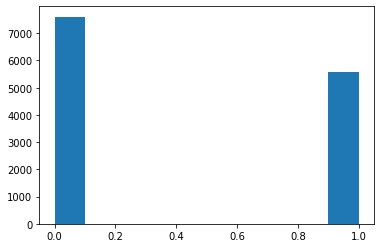

In [20]:
plt.hist(data.HS)
plt.show()

## Count positif and negative HS

Bagian ini merupakan terjemahan dari histogram diatas, yang mana ini digunakan untuk mengetahui jumlah pastinya.

In [21]:
data.HS.value_counts()

0    7608
1    5561
Name: HS, dtype: int64

# PROSES DATA

## Preprocessing data teks

Karena dataset yang digunakan berupa teks, maka teknik yang digunakan hampir mirip dengan teknik NLP (Natural Language Processing).

Preprocessing adalah suatu rangkaian langkah yang digunakan untuk membentuk “Golden Dataset”. Pada kasus Text Mining, umumnya terdapat 5 rangkaian langkah prepocessing, yaitu:

1. Case Folding : Mengubah kata menjadi lower case.
2. Tokenisasi : Memecah kalimat menjadi kumpulan kata dan remove_nonalphanumeric
3. Normalization : Memperbaiki ejaan. Handling Slangword.
4. Stopword Removal : Menghapus kata yang tidak mengandung konten.
5. Stemming : Mengubah kata menjadi kata dasar.

Preprocessing merupakan langkah krusial dalam pengelolahan data. Tahapan ini digunakan untuk mengurangi kemungkinan model gagal ketika dievaluasi, dan juga menghindari fenomena “Curse of Dimensionality”. 

In [22]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_chart(text):
    text = re.sub('\n', ' ', text) # remove every '\n'
    text = re.sub('rt', ' ', text) # remove every retweet symbol
    text = re.sub('user', ' ', text) # remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(https?://[^\s]+))', ' ', text) # remove every URL
    text = re.sub(' +', ' ', text) # remove extra spaces
    return text

def remove_nonalphanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub(' +', ' ', text) #remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

#### Fungsi-fungsi tersebut disatukan dalam fungsi yang diberi nama "preprocess" dimana fungsi ini akan diterapkan pada dataset.

In [23]:
def preprocess(text):
    text = lowercase(text) #1
    text = remove_nonalphanumeric(text) #2
    text = remove_unnecessary_chart(text) #2
    text = normalize_alay(text) #3
    text = stemming(text) #4
    text = remove_stopword(text) #5
    return text

#### Menerapkan fungsi diatas kedalam dataset data.csv pada kolom tweet.

In [24]:
data['Tweet'] = data['Tweet'].apply(preprocess)

#### Bagian ini menampilkan data yang sudah di preprocessing.

In [25]:
df = data[['Tweet','HS']]
df.head()

,Tweet,HS
0,di saat semua cowok usaha lacak perhati gue ka...,1
1,siapa yang telat beri tau kamu gue gaul dengan...,0
2,41 kadang aku pikir kenapa aku tetap percaya p...,0
3,aku itu aku dan ku tau mata tapi lihat dari ma...,0
4,kaum sudah lihat dari awal tambah lagi haha,1


## Prepare train and test data

Selanjutnya lakukan split karena supervised harus ada learning training-nya terlebih dahulu. Disini ada Train_X, Test_X, Train_Y, Test_Y yang di split dengan data tweet dan data HS dengan test size nya 3% atau 0.3

In [26]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Tweet'],df['HS'],test_size=0.3)

In [27]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# Feature Extraction
Komputer (mesin) tidak dapat mengolah data selain data numerik, sehingga dibutuhkan sebuah step untuk mengekstrak “kata” menjadi numerik dalam proses analisis sentimen. Metode ekstraksi fitur digunakan sebagai tahap awal dalam metode komputasi guna merepresentasikan data secara menyeluruh.

Secara umum terdapat 3 teknik ekstraksi fitur, yaitu:
1. Bag of Word (TF, TFIDF), akan merubah term (kata) dalam sebuah kalimat menjadi skalar.
2. Word Embedding (Glove, Word2vec, FastText), akan merubah sebuah kata menjadi vektor dengan dimensi tertentu.
3. Character Embedding, akan merubah sebuah huruf menjadi vektor dengan dimensi tertentu. 

## TFIDF Feature
Yang saya digunakan disini adalah feature extraction teknik Bag of Word yang berupa fungsi TFIDF. Apa itu TFIDF? Term Frequency — Inverse Document Frequency atau TF — IDF adalah suatu metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini juga terkenal efisien, mudah dan memiliki hasil yang akurat. Metode ini akan menghitung nilai Term Frequency (TF) dan Inverse Document Frequency (IDF) pada setiap token (kata) di setiap dokumen dalam korpus. Secara sederhana, metode TF-IDF digunakan untuk mengetahui berapa sering suatu kata muncul di dalam dokumen.

#### Setelah kita split menjadi data train dan data test, kemudian terapkan feature tersebut karena adanya library yang mendukung yaitu TFIDF langsung kita fit-kan saja datasetnya yaitu pada kolom tweet. Kemudian kita transform dari dataset yang sudah kita pisah tadi.

In [28]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df['Tweet'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [29]:
Train_X_Tfidf.shape

(9218, 13408)

In [30]:
Train_Y.shape

(9218,)

In [31]:
Test_X_Tfidf.shape

(3951, 13408)

# SVM (SUPPORT VECTOR MACHINE)
## Build, Train, and Evaluate Model
Bagian ini merupakan penerapan SVM, disini saya tidak menggunakan parameter tertentu, jadi tinggal SVM = SVC(), lalu fit-kan pada algoritma tersebut. Kemudian kita predict data test nya, catatan dataset yang dipredict harus dataset yang sudah melalui TFIDF.

Katika di run akan mendapatkan nilai accuraacy, recall, precision, dan F1. Dari hasil yang didapatkan bisa disebut lumayan baik karena biasanya accuracy diatas 80% itu sudah terhitung baik.

In [32]:
SVM = SVC()
SVM.fit(Train_X_Tfidf, Train_Y)

predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accurancy Score --> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM Recall Score --> ",recall_score(predictions_SVM, Test_Y)*100)
print("SVM Precision Score --> ",precision_score(predictions_SVM, Test_Y)*100)
print("SVM f1 Score --> ",f1_score(predictions_SVM, Test_Y)*100)

SVM Accurancy Score -->  80.73905340420147
SVM Recall Score -->  82.28120516499283
SVM Precision Score -->  69.05478627332931
SVM f1 Score -->  75.0900163666121


## Hyperparameter Tuning

Setelah itu terapkan fitur hyperparameter tuningnya, disini untuk kernel nya saya memilih linier atau rbf dengan change nya 1 sampai 10. Kemudian akan di grid search dengan hyperparameter tersebut dan akan kita coba fit kan pada data training.

Apa itu kernel RBF? Kernel RBF adalah bentuk kernelisasi yang paling umum dan merupakan salah satu kernel yang paling banyak digunakan karena kemiripannya dengan distribusi Gaussian. Fungsi kernel RBF untuk dua titik X₁ dan X₂ menghitung kesamaan atau seberapa dekat keduanya.

In [33]:
hyperparameters = {'kernel':('linier', 'rbf'), 'C':[1, 10]}
svm = SVC()
svm_tuned = GridSearchCV(svm, hyperparameters, cv=5)

In [34]:
svm_tuned.fit(Train_X_Tfidf, Train_Y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 294, in _sparse_fit
    kernel_type = self._sparse_kernels.index(kernel)
ValueError: 'linier' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linier', 'rbf')})

#### Setelah kita coba fit kan pada data training, maka akan didapatkan best C, best kernel, dan best score.


In [35]:
print('Best C:',svm_tuned.best_estimator_.C)
print('Best Kernel: ',svm_tuned.best_estimator_.kernel)
print('Best Score:',svm_tuned.best_score_)

Best C: 10
Best Kernel:  rbf
Best Score: 0.805271867640118


## Apply Best Tunning
Setelah mendapatkan nilai best C, best kernel, dan best score, selanjutnya terapkan pada SVM dengan C=10, kernel='rbf', degree=3, gamma='scale'. Kemudian kita fit kan kembali.

In [52]:
svm = SVC(C=10, kernel='rbf', degree=3, gamma='scale')
svm.fit(Train_X_Tfidf, Train_Y) #fit pada data train

SVC(C=10)

#### Setelah di run kembali di dapatkan nilai sekian, memang peningkatannya tidak terlalu signifikan. Didapatkan nilai accuracy, precision dan F1 mengalami penaikan, namun nilai recall mengalami penurunan.

In [53]:
predict_test = svm.predict(Test_X_Tfidf)
print("SVM Accurancy Score --> ", accuracy_score(predict_test, Test_Y)*100)
print("SVM Recall Score --> ", recall_score(predict_test, Test_Y)*100)
print("SVM Precision Score --> ", precision_score(predict_test, Test_Y)*100)
print("SVM f1 Score --> ", f1_score(predict_test, Test_Y)*100)

SVM Accurancy Score -->  81.14401417362693
SVM Recall Score -->  80.49267643142477
SVM Precision Score -->  72.78747742323901
SVM f1 Score -->  76.4464116345242


## Confusion Matrix



In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes, 
                         normalize=False,
                         title=None,
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plot the confusion matrix.
    Normalize can be applied by setting 'normalize=True'
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion metrix, without normalization'
            
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # we want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           #... and label them eith the respective list entries)
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
           
    # rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
             rotation_mode="anchor") 
           
    # loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center",va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
           
np.set_printoptions(precision=2)

#### Dari matriks yang sudah kita dapatkan, diketahui bahwa kita dapat menggunakan data sebenarnya sekitar 1997 data tweet yang berlabel 0 dan yang di prediksi 0. Sedangkan data tweet yang berlabel 0 dan yang di prediksi 1 sekitar 1209.

Confusion matrix, without normalization
[[1997  293]
 [ 452 1209]]


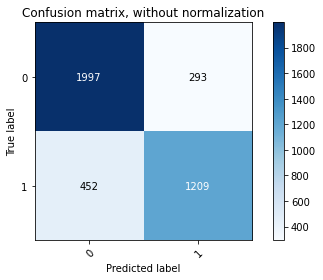

In [55]:
class_names = Test_Y
plot_confusion_matrix(Test_Y, predict_test, classes=class_names,
                     title='Confusion matrix, without normalization')
plt.show()

## Lets Predict

Bagian ini digunakan untuk melakukan prediksi terhadap tweet. Jika tergolong hate speech, maka akan muncul message 'Hate Speech'. Begitupun sebaliknya Jika tergolong bukan hate speech, maka akan muncul message 'Bukan Hate Speech'.

In [56]:
def classify(tweet):
    pred = svm.predict(Tfidf_vect.transform([tweet]))
    if pred ==1:
        return "Hate Speech"
    return "Bukan Hate Speech"

In [57]:
classify('kamu jelek sekali')

'Hate Speech'

In [58]:
classify('seru film nya, aktornya ganteng, alur ceritanya mantap')

'Bukan Hate Speech'